<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_10c_Quantum_Teleportation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install qiskit --quiet && pip install pylatexenc --quiet

In [38]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization.state_visualization import array_to_latex, plot_bloch_multivector
from qiskit.quantum_info import random_statevector
from qiskit.extensions import Initialize

In [43]:
state_vector_simulator = Aer.get_backend("statevector_simulator")

In [44]:
def get_state(circuit):
  job = execute(circuit, backend=state_vector_simulator)
  result = job.result()
  return result.get_statevector()

In [71]:
psi = random_statevector(2)
array_to_latex(psi, prefix="|\\psi\\rangle =")

<IPython.core.display.Latex object>

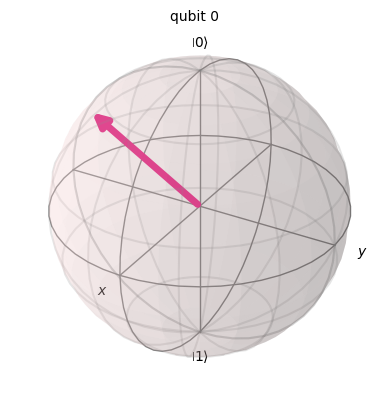

In [72]:
plot_bloch_multivector(psi)

In [73]:
init_gate = Initialize(psi)
init_gate.label = "init"

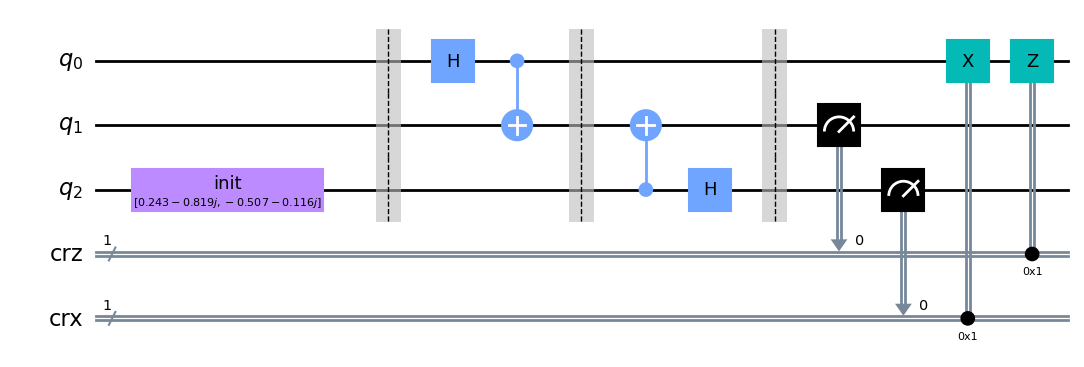

In [74]:
## SETUP
qr = QuantumRegister(3, name="q")
crz = ClassicalRegister(1, name="crz")
crx = ClassicalRegister(1, name="crx")
qc = QuantumCircuit(qr, crz, crx)

## STEP 0
qc.append(init_gate, [2])
qc.barrier()

## STEP 1
qc.h(0)
qc.cx(0, 1)
qc.barrier()

## STEP 2
qc.cx(2, 1)
qc.h(2)

## STEP 3
qc.barrier()
qc.measure(1, 0)
qc.measure(2, 1)

## STEP 4
qc.x(0).c_if(crx, 1)
qc.z(0).c_if(crz, 1)

qc.draw(output="mpl")

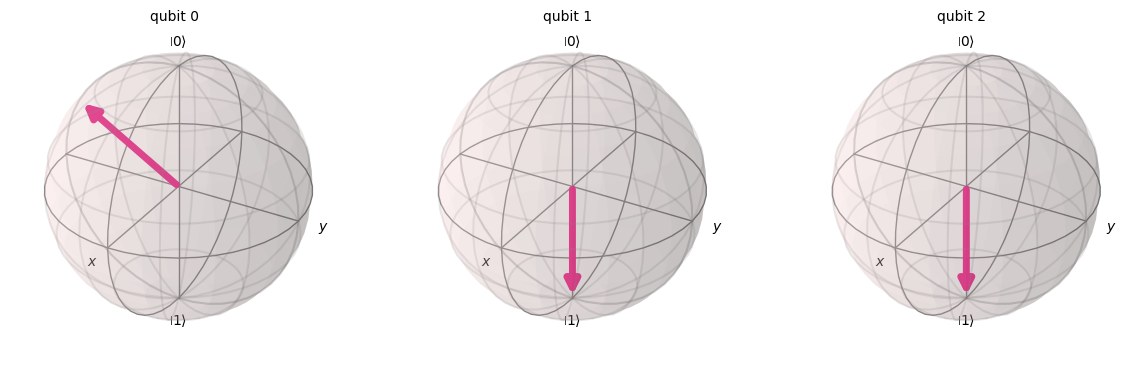

In [75]:
sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
out_vector = sim.run(qc).result().get_statevector()
plot_bloch_multivector(out_vector)